# Import image

In [17]:
from skimage.transform import resize
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# load img
img = load_img('SamplePhoto/sample3.png')
# convert loaded image to 4D array
img_array = img_to_array(img)  # creating a Numpy array with shape (X, X, 3)
img_resized = resize(img_array, (48, 48)) #resize to match dataset
img_array = img_resized.reshape((1,) + img_resized.shape)  # converting to a Numpy array with shape (X, X, 3, 1)

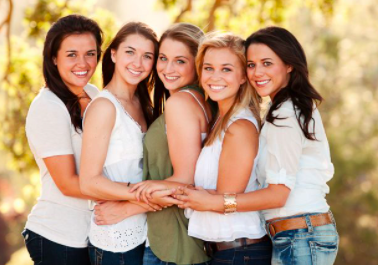

In [18]:
img

# API

In [11]:
import requests
from compreface import CompreFace
from compreface.service import DetectionService

DOMAIN: str = 'http://localhost'
PORT: str = '8000'
DETECTION_API_KEY: str = 'c590b3aa-1fe9-4b44-86ba-edcc30adcbf8'

compre_face: CompreFace = CompreFace(domain=DOMAIN, port=PORT, options={
    "limit": 0,
    "det_prob_threshold": 0.8,
    "prediction_count": 1,
    "face_plugins": "landmarks"
})

In [12]:
detection: DetectionService = compre_face.init_face_detection(DETECTION_API_KEY)
    
image_path: str = 'SamplePhoto/sample3.png'
upload = load_img(image_path)
    
result = detection.detect(image_path=image_path)

In [13]:
result

{'result': [{'box': {'probability': 0.9999940395355225,
    'x_max': 104,
    'y_max': 91,
    'x_min': 49,
    'y_min': 28},
   'landmarks': [[71, 55], [89, 54], [82, 65], [71, 71], [88, 71]]},
  {'box': {'probability': 0.9999933242797852,
    'x_max': 290,
    'y_max': 96,
    'x_min': 238,
    'y_min': 40},
   'landmarks': [[251, 65], [267, 63], [256, 75], [253, 81], [270, 79]]},
  {'box': {'probability': 0.9999016523361206,
    'x_max': 202,
    'y_max': 94,
    'x_min': 149,
    'y_min': 32},
   'landmarks': [[163, 58], [180, 60], [168, 71], [163, 74], [181, 76]]},
  {'box': {'probability': 0.9998304843902588,
    'x_max': 161,
    'y_max': 87,
    'x_min': 109,
    'y_min': 28},
   'landmarks': [[130, 52], [147, 56], [138, 65], [125, 68], [143, 72]]},
  {'box': {'probability': 0.9979262351989746,
    'x_max': 247,
    'y_max': 104,
    'x_min': 192,
    'y_min': 44},
   'landmarks': [[209, 69], [226, 69], [215, 79], [208, 85], [227, 86]]}]}

# Crop faces

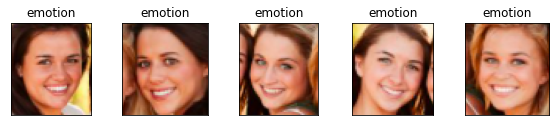

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

faces = []
fig = plt.figure(figsize=(16,20))

# crop faces in uploaded photo
for face in range(0,len(result["result"])):
    left = result["result"][face]["box"]['x_min']
    top = result["result"][face]["box"]['y_min']
    right = result["result"][face]["box"]['x_max']
    bottom = result["result"][face]["box"]['y_max']
    
    cropped = upload.crop((left, top, right, bottom))

    faces.append(cropped)

# show cropped faces
for i in range(len(faces)):
    plt.subplot(10, 8, i + 1)
    plt.title("emotion", size=12)
    plt.imshow(faces[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(());